In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

1d75023101ec17623ab7e495d5868fcd


In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

632

In [52]:
city_df=pd.DataFrame({"City":cities})
city_df.head()

,City
0,hihifo
1,airai
2,terrace
3,jamestown
4,thompson


In [66]:

city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max Temp"]=""
city_df["Humidity"]=""
city_df["Cloudiness"]=""
city_df["Wind Speed"]=""
city_df["Country"]=""
city_df["Date"]=""
first=city_df
first
        

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hihifo,,,,,,,,
1,airai,,,,,,,,
2,terrace,,,,,,,,
3,jamestown,,,,,,,,
4,thompson,,,,,,,,
...,...,...,...,...,...,...,...,...,...
627,pasni,,,,,,,,
628,dakar,,,,,,,,
629,svetlaya,,,,,,,,
630,ye,,,,,,,,


In [67]:
params={"key":weather_api_key}
url_lat="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url_lat}appid={weather_api_key}&units={units}&q="
print(query_url)
record=0
set_1=1
for index, row in first.iterrows():
    
    base_url="http://api.openweathermap.org/data/2.5/weather?"
    city=row["City"]
    params['address']=f"{city}"
    response = requests.get(query_url+city).json()
    try:
        first.loc[index,"Lat"]=response['coord']['lat']
        first.loc[index,"Lng"]=response['coord']['lon']
        first.loc[index,"Max Temp"]=response["main"]["temp_max"]
        first.loc[index,"Humidity"]=response['main']['humidity']
        first.loc[index,"Cloudiness"]=response['clouds']['all']
        first.loc[index,"Wind Speed"]=response['wind']['speed']
        first.loc[index,"Country"]=response['sys']['country']
        first.loc[index,"Date"]=response['dt']
        print(f"Processing Record {record} of Set{set_1} | {city}")
        record +=1
        
    except:
        print(f"{city} is not found. Skipping..")
    if record >49:
        set_1 +=1
        record +=1
        
    

first

http://api.openweathermap.org/data/2.5/weather?appid=1d75023101ec17623ab7e495d5868fcd&units=imperial&q=
hihifo is not found. Skipping..
Processing Record 0 of Set1 | airai
Processing Record 1 of Set1 | terrace
Processing Record 2 of Set1 | jamestown
Processing Record 3 of Set1 | thompson
Processing Record 4 of Set1 | khatanga
Processing Record 5 of Set1 | rikitea
Processing Record 6 of Set1 | siderno
Processing Record 7 of Set1 | bredasdorp
kadykchan is not found. Skipping..
Processing Record 8 of Set1 | muros
Processing Record 9 of Set1 | butaritari
Processing Record 10 of Set1 | viedma
Processing Record 11 of Set1 | omboue
Processing Record 12 of Set1 | north bend
Processing Record 13 of Set1 | nieuw amsterdam
Processing Record 14 of Set1 | atuona
vaitupu is not found. Skipping..
Processing Record 15 of Set1 | husavik
Processing Record 16 of Set1 | busselton
Processing Record 17 of Set1 | albany
Processing Record 18 of Set1 | ushuaia
Processing Record 19 of Set1 | hilo
Processing Rec

Processing Record 315 of Set141 | naranjal
Processing Record 317 of Set142 | pisco
Processing Record 319 of Set143 | nanortalik
Processing Record 321 of Set144 | nome
Processing Record 323 of Set145 | swift current
Processing Record 325 of Set146 | lianran
Processing Record 327 of Set147 | limoux
Processing Record 329 of Set148 | manggar
Processing Record 331 of Set149 | zhigansk
Processing Record 333 of Set150 | zhuhai
Processing Record 335 of Set151 | margate
Processing Record 337 of Set152 | russell
Processing Record 339 of Set153 | wuhu
Processing Record 341 of Set154 | umba
Processing Record 343 of Set155 | pahrump
Processing Record 345 of Set156 | bahia honda
Processing Record 347 of Set157 | betamcherla
Processing Record 349 of Set158 | upernavik
Processing Record 351 of Set159 | sarangani
Processing Record 353 of Set160 | santa rosa
Processing Record 355 of Set161 | esperance
Processing Record 357 of Set162 | de-kastri
Processing Record 359 of Set163 | la ronge
Processing Recor

Processing Record 689 of Set333 | wajima
Processing Record 691 of Set334 | xocali
Processing Record 693 of Set335 | guanaja
Processing Record 695 of Set336 | nueva loja
Processing Record 697 of Set337 | dubbo
Processing Record 699 of Set338 | hurghada
Processing Record 701 of Set339 | makakilo city
Processing Record 703 of Set340 | samarai
Processing Record 705 of Set341 | clearwater
Processing Record 707 of Set342 | kargasok
Processing Record 709 of Set343 | raga
Processing Record 711 of Set344 | nizwa
Processing Record 713 of Set345 | santa ana
Processing Record 715 of Set346 | rudozem
Processing Record 717 of Set347 | tura
Processing Record 719 of Set348 | yamada
Processing Record 721 of Set349 | aranos
Processing Record 723 of Set350 | antofagasta
Processing Record 725 of Set351 | antalaha
Processing Record 727 of Set352 | warrnambool
Processing Record 729 of Set353 | prescott
Processing Record 731 of Set354 | kolvereid
Processing Record 733 of Set355 | kamenka
Processing Record 73

Processing Record 1062 of Set526 | rio gallegos
Processing Record 1064 of Set527 | presidencia roque saenz pena
Processing Record 1066 of Set528 | jumla
Processing Record 1068 of Set529 | pierre
Processing Record 1070 of Set530 | fayetteville
Processing Record 1072 of Set531 | paciran
Processing Record 1074 of Set532 | miandrivazo
Processing Record 1076 of Set533 | raalte
Processing Record 1078 of Set534 | cordoba
Processing Record 1080 of Set535 | the valley
Processing Record 1082 of Set536 | dolores
Processing Record 1084 of Set537 | mount gambier
Processing Record 1086 of Set538 | goderich
Processing Record 1088 of Set539 | mnogovershinnyy
Processing Record 1090 of Set540 | north battleford
Processing Record 1092 of Set541 | aykhal
Processing Record 1094 of Set542 | san antero
rawannawi is not found. Skipping..
viligili is not found. Skipping..
Processing Record 1098 of Set545 | sinop
Processing Record 1100 of Set546 | vung tau
Processing Record 1102 of Set547 | marihatag
paradwip i

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hihifo,,,,,,,,
1,airai,-8.93,125.41,78.84,51,0,3.71,TL,1604031722
2,terrace,54.52,-128.6,38.43,84,100,3.2,CA,1604031703
3,jamestown,42.1,-79.24,43,100,90,10.29,US,1604031722
4,thompson,55.74,-97.86,23.41,98,88,7.87,CA,1604031722
...,...,...,...,...,...,...,...,...,...
627,pasni,25.26,63.47,76.01,30,0,12.86,PK,1604031842
628,dakar,14.69,-17.44,82.4,78,0,9.17,SN,1604031843
629,svetlaya,46.54,138.33,47.61,67,0,5.68,RU,1604031843
630,ye,,,,,,,,


In [68]:
#replacing the empty string with NAN values and dropping those rows and getting the clean data
first=first.replace(r'^\s*$', np. nan, regex=True)
first=first.dropna()
first


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,airai,-8.93,125.41,78.84,51.0,0.0,3.71,TL,1.604032e+09
2,terrace,54.52,-128.60,38.43,84.0,100.0,3.20,CA,1.604032e+09
3,jamestown,42.10,-79.24,43.00,100.0,90.0,10.29,US,1.604032e+09
4,thompson,55.74,-97.86,23.41,98.0,88.0,7.87,CA,1.604032e+09
5,khatanga,71.97,102.50,-0.51,85.0,0.0,10.11,RU,1.604032e+09
...,...,...,...,...,...,...,...,...,...
626,makarov,48.63,142.80,43.93,72.0,69.0,14.85,RU,1.604032e+09
627,pasni,25.26,63.47,76.01,30.0,0.0,12.86,PK,1.604032e+09
628,dakar,14.69,-17.44,82.40,78.0,0.0,9.17,SN,1.604032e+09
629,svetlaya,46.54,138.33,47.61,67.0,0.0,5.68,RU,1.604032e+09


In [69]:
#export data into csv
first.to_csv("Output/file.csv", index=False, header=True)
#display the dataframe
first.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.851274,12.692599,57.900379,74.237522,51.454389,7.355749,1.604032e+09
std,32.930976,91.053171,21.965214,21.330698,40.613528,5.505190,6.841120e+01
min,-54.800000,-175.200000,-6.540000,5.000000,0.000000,0.070000,1.604031e+09
25%,-4.220000,-69.220000,44.010000,65.000000,1.000000,3.360000,1.604032e+09
50%,25.260000,15.650000,60.800000,79.000000,53.000000,5.950000,1.604032e+09
75%,48.830000,96.700000,77.000000,91.000000,93.000000,10.040000,1.604032e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,31.090000,1.604032e+09


In [100]:
#check if any humidity greater than 100
humidity=first.loc[first["Humidity"]>100]
humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


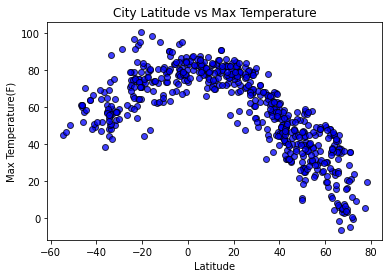

In [101]:
#plotting the data
#Lattitude vs Temperature Plot
lat= first["Lat"]
temp=first["Max Temp"]
plt.scatter(lat, temp,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature")
plt.show()

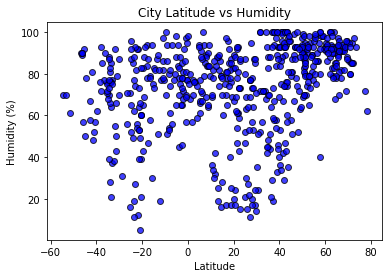

In [102]:
#Latitude vs Humidity Plot
lat= first["Lat"]
hum=first["Humidity"]
plt.scatter(lat,hum,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

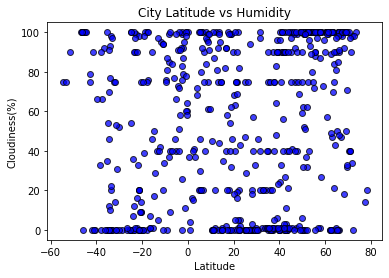

In [103]:
#Latitude vs Cloudiness Plot
lat= first["Lat"]
cloud=first["Cloudiness"]
plt.scatter(lat,cloud,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

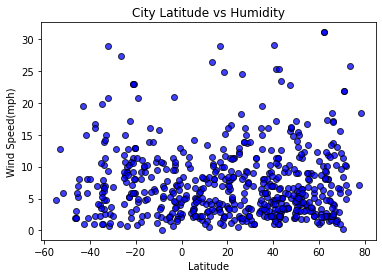

In [104]:
#Latitude vs Wind Speed Plot
lat= first["Lat"]
wind=first["Wind Speed"]
plt.scatter(lat,wind,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

In [105]:
#Linear Regression


NameError: name 'housing_data' is not defined

The r-squared is: 0.7894131074213768


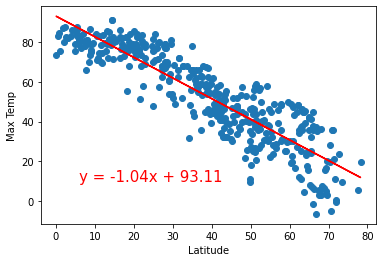

In [118]:
#Northern Hemisphere 
north_hem=first.loc[first["Lat"]>0]
lat_north=north_hem["Lat"]
tem_north=north_hem["Max Temp"]
hum_north=north_hem["Humidity"]
cloud_north=north_hem["Cloudiness"]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = lat_north
y_values = tem_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4226400567690925


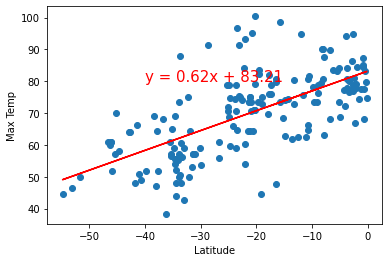

In [150]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_hem=first.loc[first["Lat"]<0]
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1270353943229727


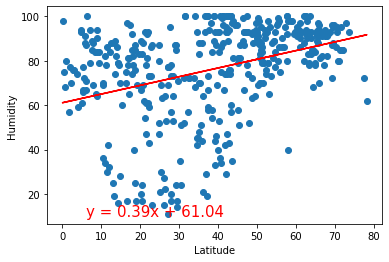

In [120]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = lat_north
y_values = hum_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0150302907189969


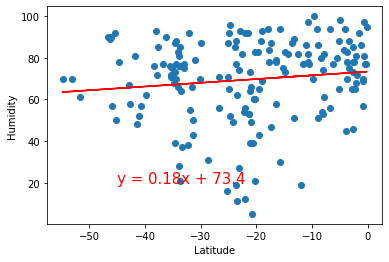

In [149]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
south_hem=first.loc[first["Lat"]<0]
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.052424203231762584


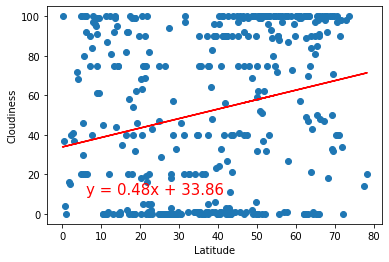

In [122]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = lat_north
y_values = cloud_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.018086635510724185


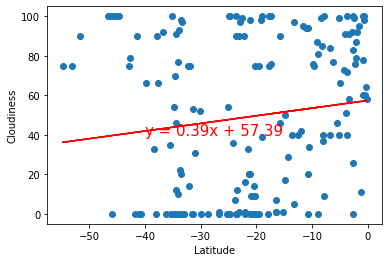

In [145]:
 #Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_hem=first.loc[first["Lat"]<0]
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.007342526304155392


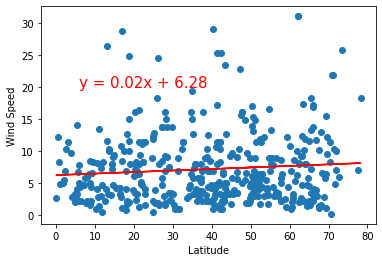

In [143]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
north_hem=first.loc[first["Lat"]>0]
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0046140216869398325


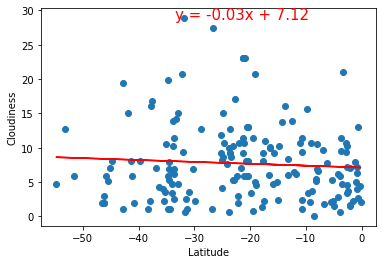

In [148]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_hem=first.loc[first["Lat"]<0]


x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,20),xytext=(0.8,0.95),textcoords='axes fraction',horizontalalignment='right',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()